***K-MEANS CLUSTERING***

#FOR RANDOM GENERATION OF POINTS

In [21]:
import math, random
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :
    irregularity =  irregularity * 2*math.pi / numVerts
    spikeyness = spikeyness * aveRadius
    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp
    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k
    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i =  random.gauss(aveRadius, spikeyness)
        x =  ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )
        angle = angle + angleSteps[i]

    return points

verts = generatePolygon( ctrX=100, ctrY=100, aveRadius=200, irregularity=1, spikeyness=0.11, numVerts=50 )
pa = Polygon(verts)

#PRE-DEFINED POINTS FROM STATES

[(41.3572, -74.695), (41.3394, -74.6559), (40.9934, -73.894), (40.8398, -73.9586), (40.7691, -74.0094), (40.6994, -74.0231), (40.6786, -74.0437), (40.6515, -74.0808), (40.6421, -74.1357), (40.6452, -74.1962), (40.5952, -74.2003), (40.5566, -74.2195), (40.4877, -74.2552), (40.4762, -74.2264), (40.5253, -73.9503), (40.4846, -73.8885), (40.0045, -73.9352), (39.6131, -74.041), (39.4744, -74.2209), (38.9882, -74.6713), (38.8664, -74.8553), (38.8472, -75.0476), (39.0565, -75.1685), (39.2525, -75.325), (39.45, -75.5544), (39.4966, -75.5612), (39.4998, -75.5283), (39.5411, -75.5338), (39.5761, -75.509), (39.6237, -75.5708), (39.6713, -75.5104), (39.7167, -75.4843), (39.8033, -75.4156), (39.836, -75.2632), (39.8823, -75.1918), (40.118, -74.7922), (40.139, -74.7331), (40.2565, -74.8485), (40.3361, -74.9419), (40.402, -74.9721), (40.424, -75.0627), (40.4898, -75.0613), (40.5733, -75.1067), (40.5639, -75.2138), (40.6192, -75.2028), (40.6494, -75.2069), (40.8284, -75.0806), (40.8429, -75.0998), (40

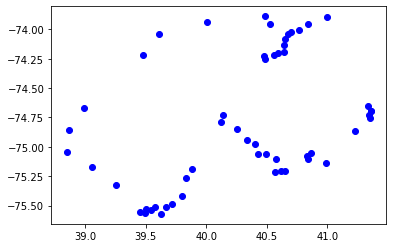

In [1]:
#%%
"""for states"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import json
import random

f = open('states.json')
data = json.load(f)

a = data['New Jersey']['Coordinates']
x1=[]
y1 = []
output = []
for i in a:
    output.append((i['lat'], i['lng']))
    x1.append(i['lat'])
    y1.append(i['lng'])
plt.scatter(x1,y1, c='b')
plt.show()

In [2]:
from shapely.geometry import Polygon, Point
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)

    return points

In [22]:
#change 'output' to 'verts' for points randomly generated
p = random_points_within(Polygon(verts), 50000)
points=[]
x_point = []
y_point = []
for i in p:
    points.append([i.x, i.y])
    x_point.append(i.x)
    y_point.append(i.y)
points = np.array(points)

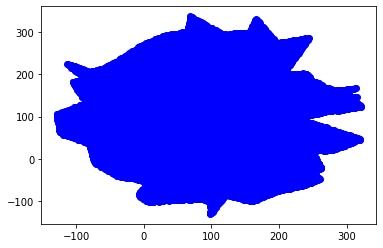

In [23]:
plt.scatter(x_point,y_point, c='b')
plt.show()

In [24]:
X=points
n_regions = 20
kmeans = KMeans(n_clusters = n_regions, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [25]:
colors = ['yellowgreen','khaki','cornflowerblue','darkgrey']
regions = ['Grasslands','Cultivated Land','Water Bodies','Constructed Buildings']
a = [0]*4
for i in range(4):
  print('Enter Percentage coverage of ', regions[i],": ")
  a[i] = int(input())

Enter Percentage coverage of  Grasslands : 
40
Enter Percentage coverage of  Cultivated Land : 
10
Enter Percentage coverage of  Water Bodies : 
20
Enter Percentage coverage of  Constructed Buildings : 
30


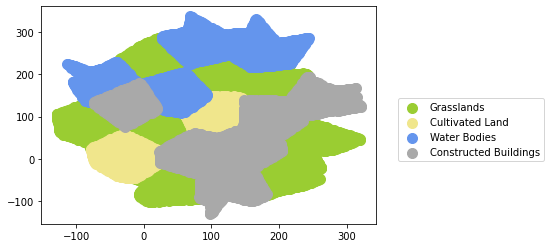

In [26]:
ind = 0
for i in range(4):
  r = (a[i]*n_regions)//100
  for j in range(r):
    if(j==0):
      plt.scatter(X[y_kmeans == ind, 0], X[y_kmeans == ind, 1], s = 100, c = colors[i], label=regions[i])
    else:
      plt.scatter(X[y_kmeans == ind, 0], X[y_kmeans == ind, 1], s = 100, c = colors[i])
    a[i]-=1
    ind+=1
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()